In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from uedge import *
from uedge.hdf5 import *
#import plotmesh as pm
from uetools import Case
from uedge.gridue import write_gridue
from Forthon import gchange

UEDGE configuration file /home/sseethalla25/.uetoolsrc read.


In [2]:
c1 = Case('input_coarse.yaml')

No diffusivity-file supplied: reading from save-file ".../jupyter/force_balance_test/fb_puff_coarse=1e-2_last_ii2.hdf5"
  User-specified diffusivities read from HDF5 file ".../jupyter/force_balance_test/fb_puff_coarse=1e-2_last_ii2.hdf5"
UETOOLS-style save successfully restored from .../jupyter/force_balance_test/fb_puff_coarse=1e-2_last_ii2.hdf5

*** UEDGE arrays populated: Warning, case may noy be fully converged ***
fnrm without preconditioning: 65.4



In [3]:
bbb.dtphi

1e+20

In [13]:
com.nxleg[0] = [16,24] # No cells in inner/outer leg
com.nxcore[0] = [7,5] # No cells in inner/outer core region
com.nycore[0]=8        # Number of radial zones in 1st core of plasma
com.nysol[0]=14        # Number of radial zones in 1st SOL
bbb.npltsor=1     #number sources on plates; must be <= 10
# Number of individual sources
nwsor = 3

# OUTER (big w legs)
bbb.issorlb[0:3] = [0, 1, 0]            # Measured from left boundary?
bbb.igspsoro[0:3] = [1, 1, 2]           # Species affected by outer sink/source
bbb.jxsoro[0:3] = [1, 1, 1]             # 0=inner mesh region, 1=outer
bbb.matwso[0:3] = [1, 1, 1]             # Switch for material limits (use 1)
bbb.wgaso[0:3] = [0.5, 0.3, 0.3]        # Source/sink width
bbb.xgaso[0:3] = [0.7, 0.1, 0.7]        # Sink/source location from boundary 
bbb.albdso[0:3] = [1.0, 1.0, 1.0]       # Pump albedo
bbb.igaso[0:3] = [700, 0, 0.0005]        # Gas source strength (Amps)

# INNER (little w legs)
bbb.igspsori[0:3] = [1, 1, 2]           # Species affected by inner sink/source
bbb.jxsori[0:3] = [1, 1, 1]             # 0=inner mesh region, 1=outer
bbb.matwsi[0:3] = [1, 1, 1]             # Switch for material limits (use 1)
bbb.wgasi[0:3] = [0.3, 0.05, 10.0]      # Source/sink width
bbb.xgasi[0:3] = [0.8, 0.0, 0.0]        # Sink/source location from boundary
bbb.albdsi[0:3] = [1.0, 0.3, 1.0]       # Pump albedo
bbb.igasi[0:3] = [0, 0, 0]              # Gas source strength (Amps)
c1.populate()
c1.converge(savefname="fb_puff_coarse=250_igaso=700", dtreal=1e-9)


*** UEDGE arrays populated: WARNING, case NOT converged ***
fnrm without preconditioning: 4.00e+04

Requested save-path ../solutions not found, writing to cwd!
*----------------------------------------------------------*
 Need to take initial step with Jacobian; trying to do here 
*----------------------------------------------------------*
 Reading grid data from /home/sseethalla25/UETOOLS-Reactor/jupyter/force_balance_test/gridue_v15_orthogonal.hdf5.hdf5
 Grid data read successfully:
     file name:   /home/sseethalla25/UETOOLS-Reactor/jupyter/force_balance_test/gridue_v15_orthogonal.hdf5.hdf5
     run-ID:      TokaMaker:                                                  
  Updating Jacobian, npe =                      1
 iter=    0 fnrm=     0.2479353293139431E-02 nfe=      1
  Updating Jacobian, npe =                      2
 iter=    1 fnrm=     0.3349612145972027E-05 nfe=      4


 nksol ---  iterm = 1.
            maxnorm(sf*f(u)) .le. ftol, where maxnorm() is
            the max

In [9]:
bbb.npltsor

1

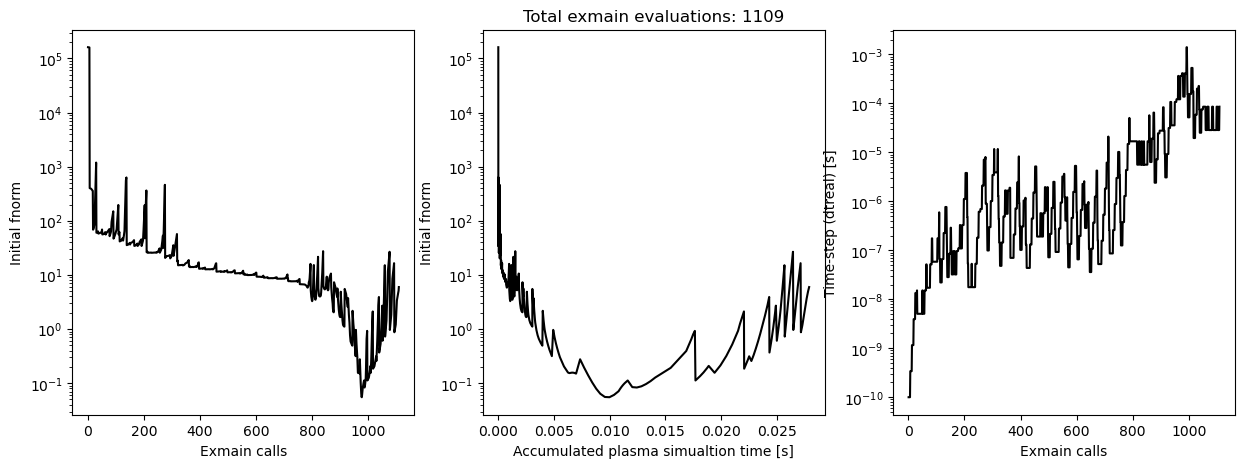

In [5]:
Case().solver.convergenceanalysis('/home/sseethalla25/UETOOLS-Reactor/jupyter/force_balance_test/fb_carbon_neon_init3_last_ii2.hdf5');

In [5]:
bbb.istewc

2


*** UEDGE arrays populated: Case appears converged ***
fnrm without preconditioning: 8.73e-04

1.0201499249276822e+21 1.7936714390614714e+20
0


/home/sseethalla25/UETOOLS-Reactor/jupyter/force_balance_test/plot_sinksource.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()


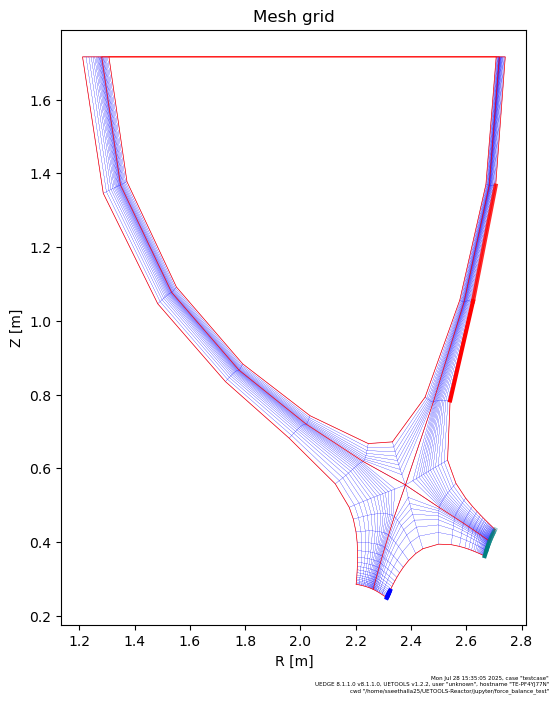

In [7]:
import plot_sinksource
import importlib
importlib.reload(plot_sinksource)
c1.populate()
plot_sinksource.plot_sinksource(c1)

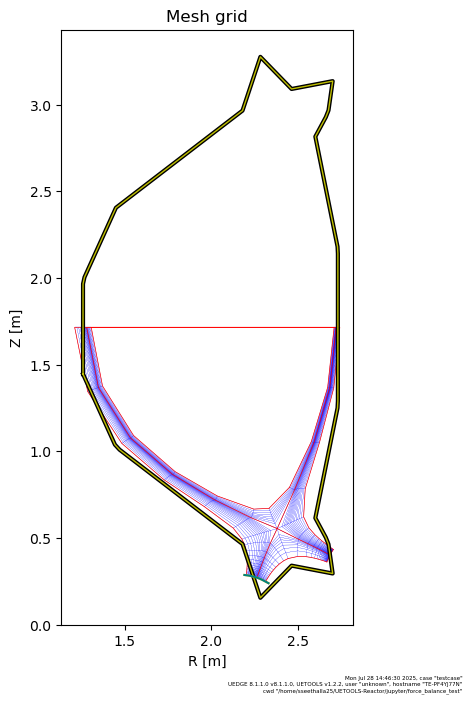

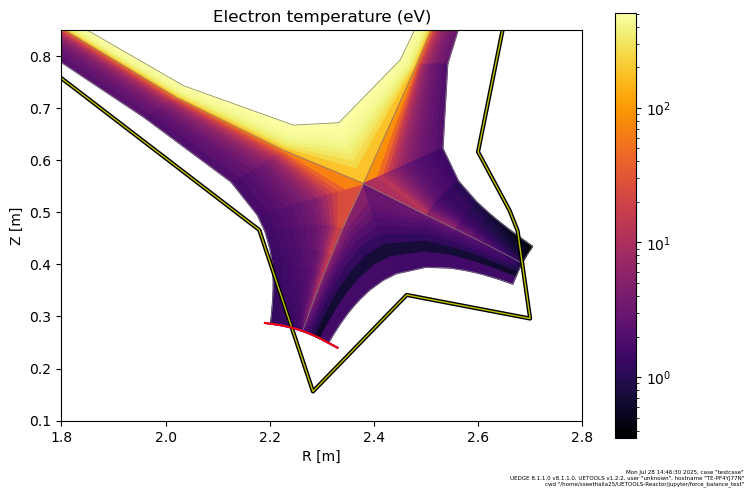

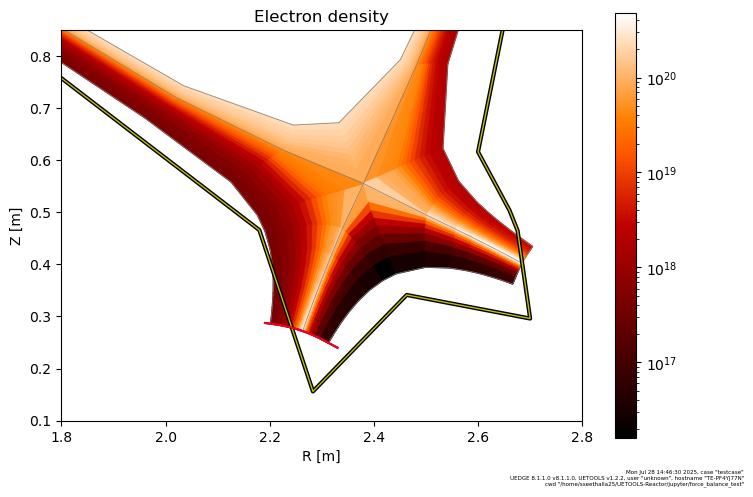

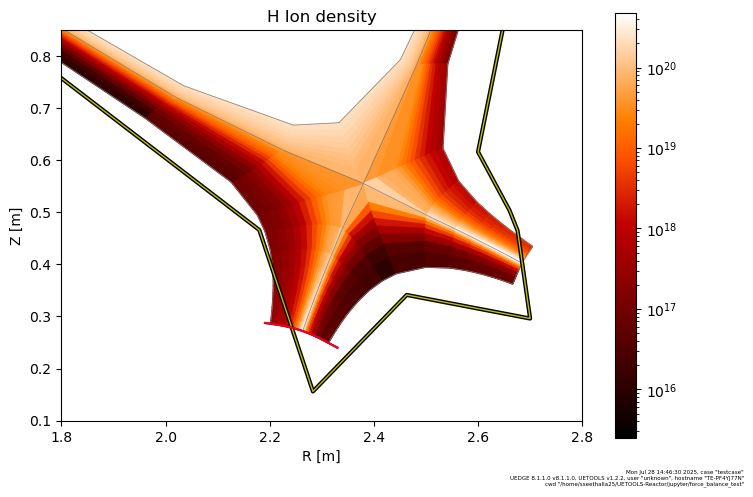

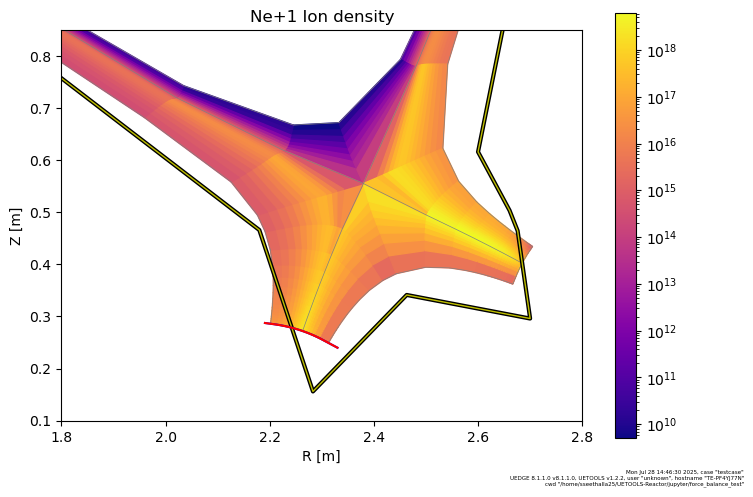

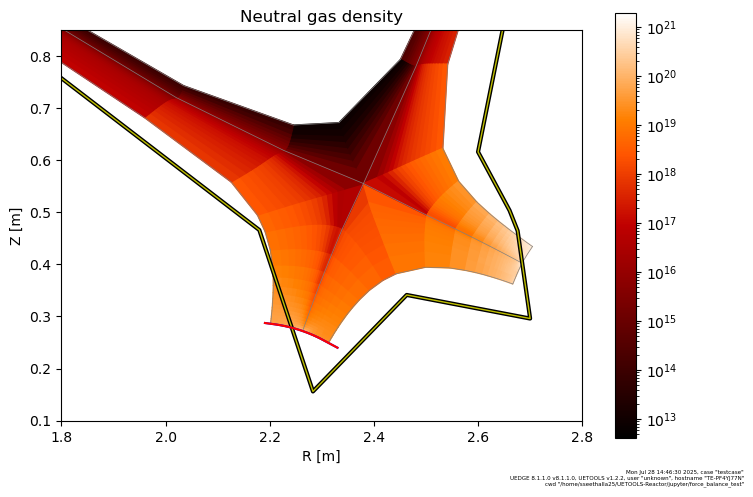

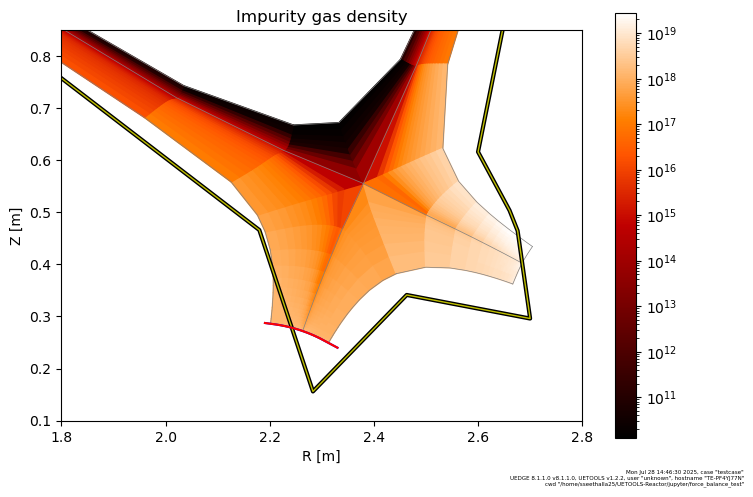

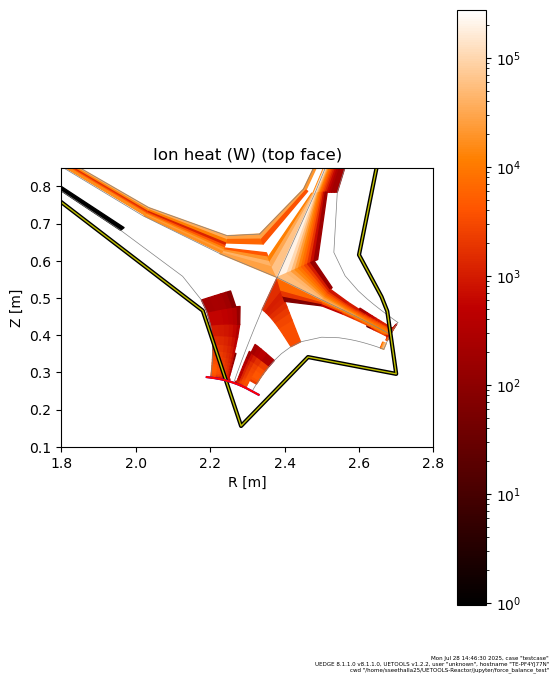

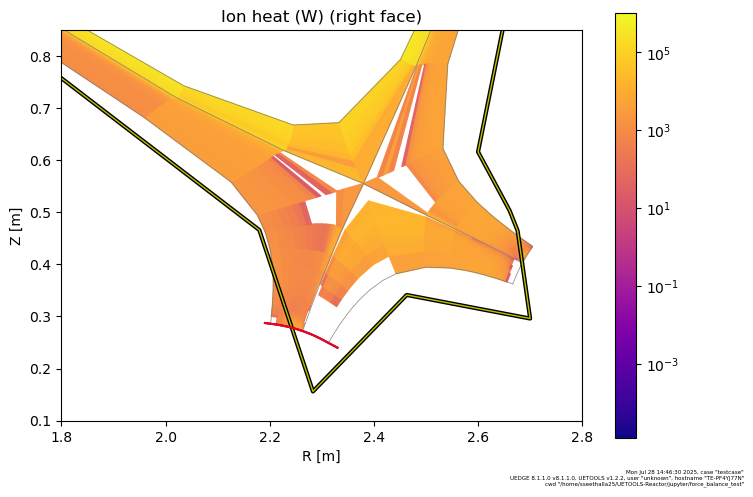

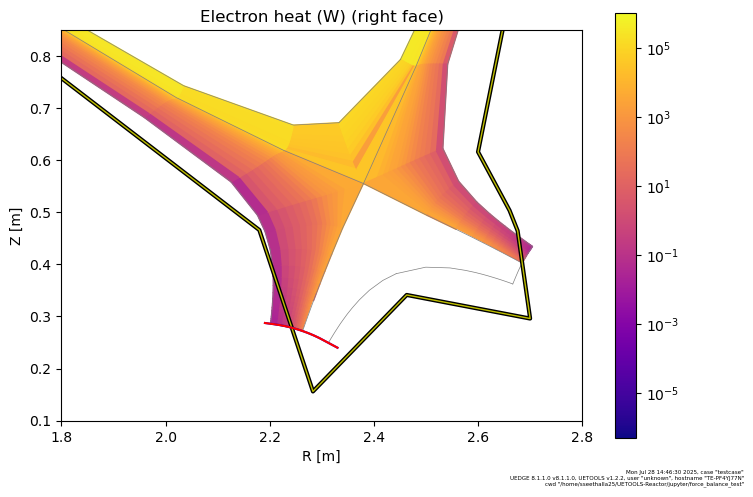

In [3]:
#TODO: neutral pressure
#TODO: compare Figure 16.11 in Stangeby
import seaborn as sns
sns.reset_orig()

c1.plot.grid(linewidth=0.1, #grid plot
   vessel=True, 
   plates=True, 
   platecolor=['gold','teal'], 
   lcfs=True, 
   lcfscolor='r', 
   linecolor='b',
   title='Mesh grid',
#    aspect="auto"
  );
c1.plot.mesh(
    bbb.te/bbb.ev,
    log=True,
    cmap='inferno',
    title='Electron temperature (eV)',
    figsize=(7,5), 
    xlim=(1.8, 2.8), 
    ylim=(0.1,0.85), 

);
c1.plot.mesh(
    bbb.ne, 
    log=True, 
    cmap='gist_heat',
    title='Electron density',
    figsize=(7,5), 
    xlim=(1.8, 2.8), 
    ylim=(0.1,0.85), 
);
c1.plot.mesh(
    bbb.ni[:, :, 0], 
    log=True, 
    cmap='gist_heat',
    title='H Ion density',
    figsize=(7,5), 
    xlim=(1.8, 2.8), 
    ylim=(0.1,0.85), 
);
c1.plot.mesh(
    bbb.ni[:, :, 2], 
    log=True, 
    cmap='plasma',
    title='Ne+1 Ion density',
    figsize=(7,5), 
    xlim=(1.8, 2.8), 
    ylim=(0.1,0.85), 
);
c1.plot.mesh(
    bbb.ng[:, :, 0],
    log=True, 
    cmap='gist_heat',
    title='Neutral gas density',
    figsize=(7,5), 
    xlim=(1.8, 2.8), 
    ylim=(0.1,0.85), 

);
c1.plot.mesh(
    bbb.ng[:,:,1], 
    log=True, 
    cmap='gist_heat',
    title='Impurity gas density',
    figsize=(7,5), 
    xlim=(1.8, 2.8), 
    ylim=(0.1,0.85), 
);
c1.plot.mesh(
    bbb.feix, 
    log=True, 
    cmap='gist_heat',
    title='Ion heat (W) (top face)',
    xlim=(1.8, 2.8), 
    ylim=(0.1,0.85), 
);
c1.plot.mesh(
    bbb.feiy, 
    log=True, 
    cmap='plasma',
    title='Ion heat (W) (right face)',
    figsize=(7,5), 
    xlim=(1.8, 2.8), 
    ylim=(0.1,0.85), 
);
c1.plot.mesh(
    bbb.feey, 
    log=True, 
    cmap='plasma',
    title='Electron heat (W) (right face)',
    figsize=(7,5), 
    xlim=(1.8, 2.8), 
    ylim=(0.1,0.85), 
);
plt.show()

12 52


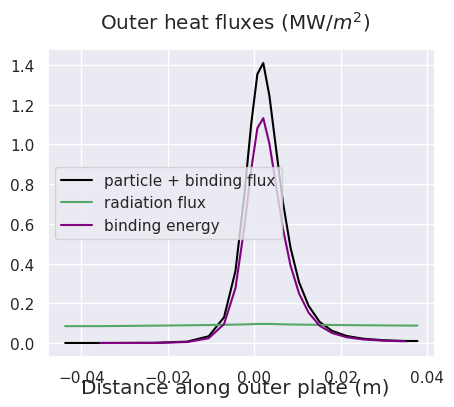

In [14]:
fig, axs = plt.subplots(1, figsize=(5,4))
bbb.fqp=0
bbb.plateflux(); #internally calculated fluxes (postprocessing)
fig.suptitle('Outer heat fluxes (MW/$m^2$)')
fig.supxlabel('Distance along outer plate (m)')
x = com.yyrb[1:-1]
axs.plot(com.yyrb,1.e-6*(bbb.sdtrb), label='particle + binding flux', color='0')
axs.plot(com.yyrb,1.e-6*(bbb.sdrrb), label='radiation flux', color='g')
axs.plot(x, bbb.sbindrb[1:com.ny+1,:]*1e-6, color='purple', label='binding energy')
print(com.nisp,com.nx)
axs.legend()
# plt.savefig('outer_div_plot2.png')
plt.show()


Restoring case from HDF5 file:
  Rate dirs read from .uedgerc
  Grid read from .../jupyter/force_balance_test/fb_puff_coarse=250_last_ii2.hdf5
  User-specified diffusivities read from HDF5 file ".../jupyter/force_balance_test/fb_puff_coarse=250_last_ii2.hdf5"
UETOOLS-style save successfully restored from .../jupyter/force_balance_test/fb_puff_coarse=250_last_ii2.hdf5

*** UEDGE arrays populated: WARNING, case NOT converged ***
fnrm without preconditioning: 1.10e+05



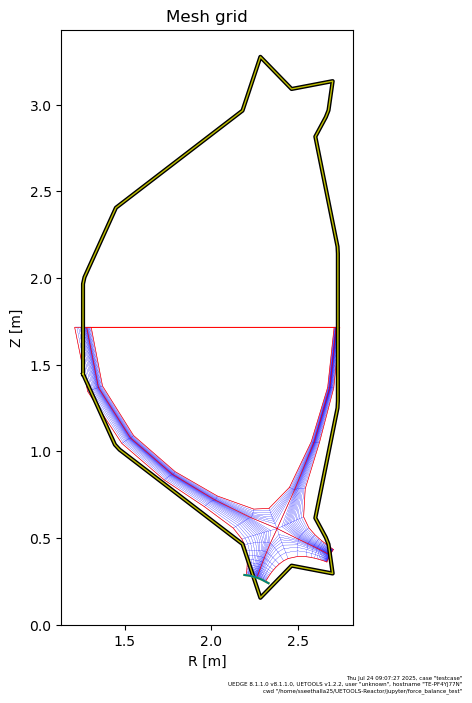

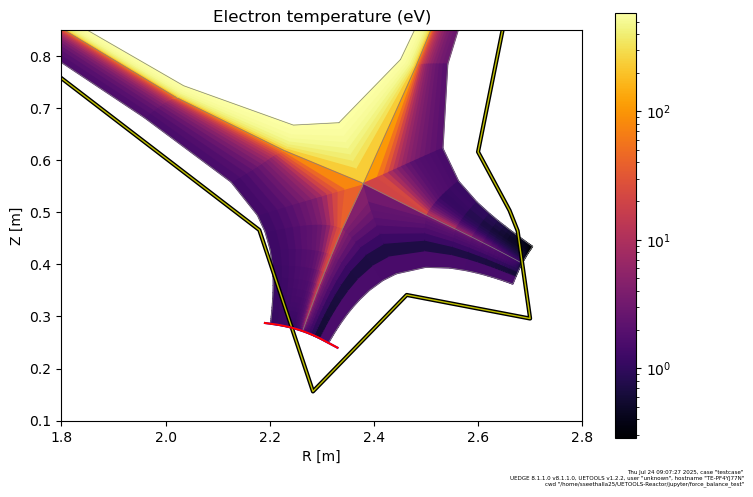

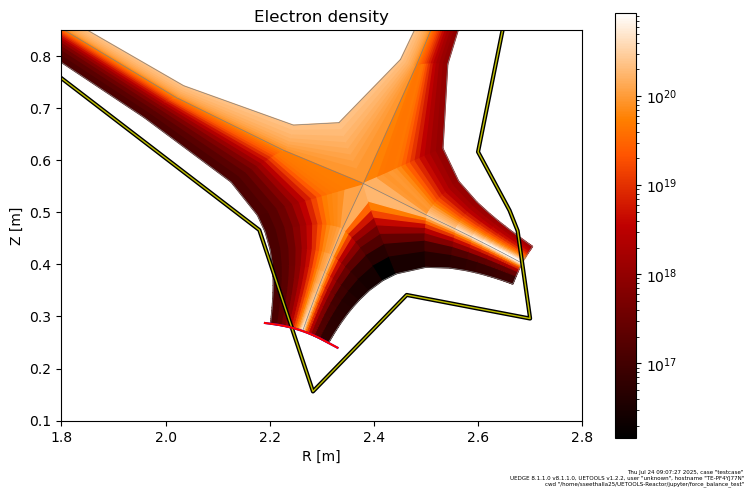

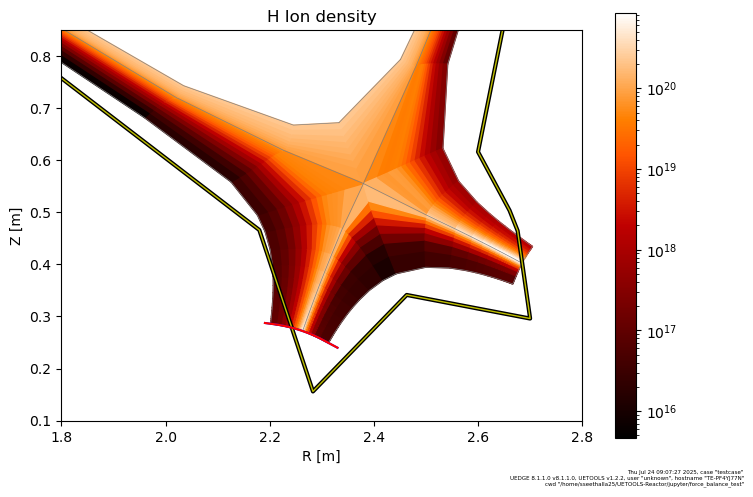

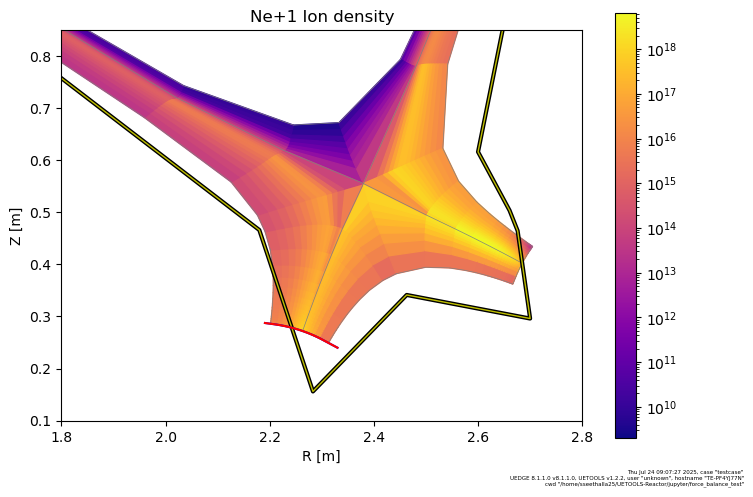

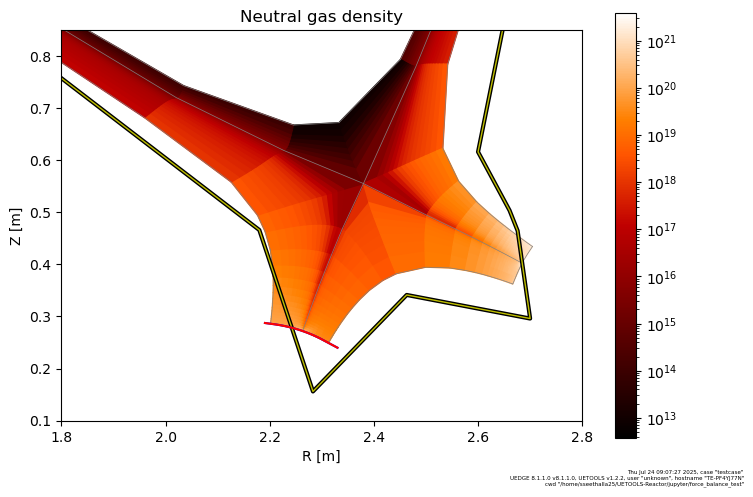

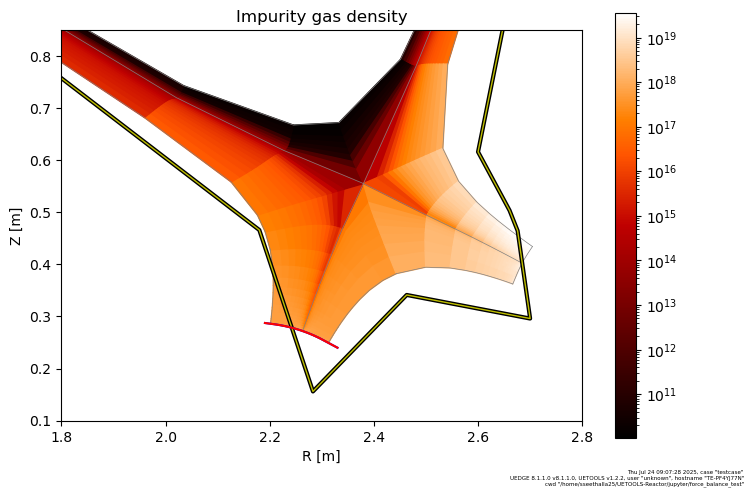

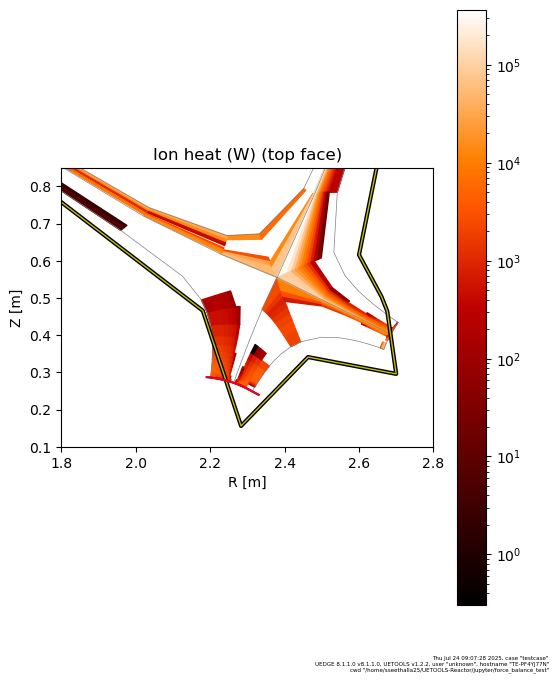

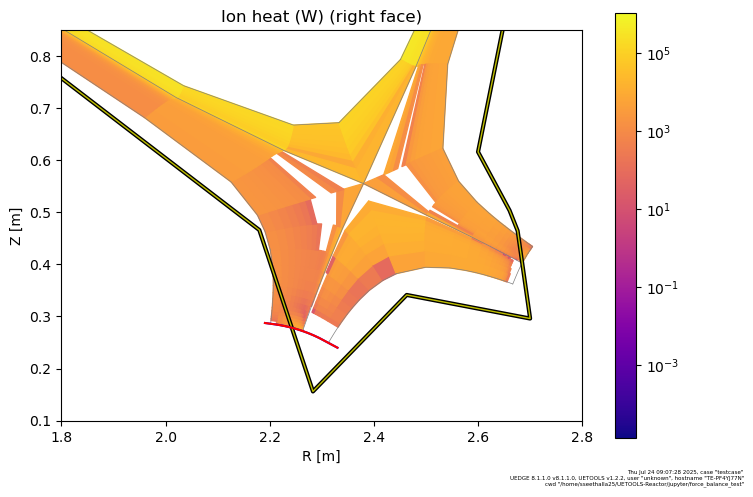

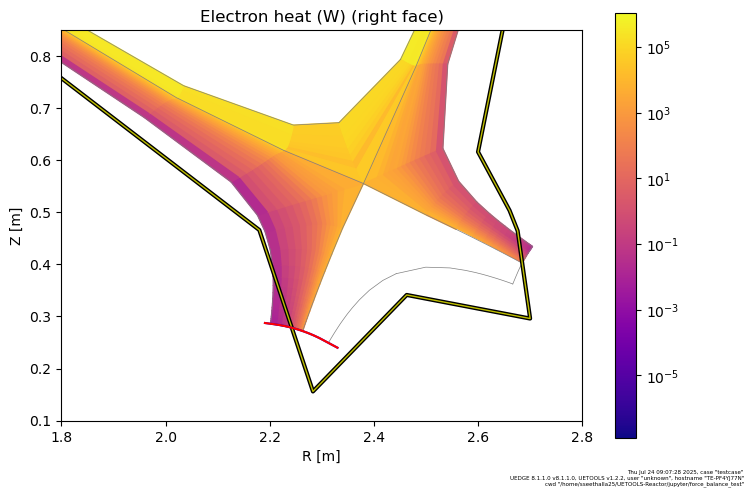

In [10]:
#TODO: neutral pressure
#TODO: compare Figure 16.11 in Stangeby
import seaborn as sns
sns.reset_orig()
c2 = Case('fb_puff_coarse=250_last_ii2.hdf5')
c2.plot.grid(linewidth=0.1, #grid plot
   vessel=True, 
   plates=True, 
   platecolor=['gold','teal'], 
   lcfs=True, 
   lcfscolor='r', 
   linecolor='b',
   title='Mesh grid',
#    aspect="auto"
  );
c2.plot.mesh(
    bbb.te/bbb.ev,
    log=True,
    cmap='inferno',
    title='Electron temperature (eV)',
    figsize=(7,5), 
    xlim=(1.8, 2.8), 
    ylim=(0.1,0.85), 

);
c2.plot.mesh(
    bbb.ne, 
    log=True, 
    cmap='gist_heat',
    title='Electron density',
    figsize=(7,5), 
    xlim=(1.8, 2.8), 
    ylim=(0.1,0.85), 
);
c2.plot.mesh(
    bbb.ni[:, :, 0], 
    log=True, 
    cmap='gist_heat',
    title='H Ion density',
    figsize=(7,5), 
    xlim=(1.8, 2.8), 
    ylim=(0.1,0.85), 
);
c2.plot.mesh(
    bbb.ni[:, :, 2], 
    log=True, 
    cmap='plasma',
    title='Ne+1 Ion density',
    figsize=(7,5), 
    xlim=(1.8, 2.8), 
    ylim=(0.1,0.85), 
);
c2.plot.mesh(
    bbb.ng[:, :, 0],
    log=True, 
    cmap='gist_heat',
    title='Neutral gas density',
    figsize=(7,5), 
    xlim=(1.8, 2.8), 
    ylim=(0.1,0.85), 

);
c2.plot.mesh(
    bbb.ng[:,:,1], 
    log=True, 
    cmap='gist_heat',
    title='Impurity gas density',
    figsize=(7,5), 
    xlim=(1.8, 2.8), 
    ylim=(0.1,0.85), 
);
c2.plot.mesh(
    bbb.feix, 
    log=True, 
    cmap='gist_heat',
    title='Ion heat (W) (top face)',
    xlim=(1.8, 2.8), 
    ylim=(0.1,0.85), 
);
c2.plot.mesh(
    bbb.feiy, 
    log=True, 
    cmap='plasma',
    title='Ion heat (W) (right face)',
    figsize=(7,5), 
    xlim=(1.8, 2.8), 
    ylim=(0.1,0.85), 
);
c2.plot.mesh(
    bbb.feey, 
    log=True, 
    cmap='plasma',
    title='Electron heat (W) (right face)',
    figsize=(7,5), 
    xlim=(1.8, 2.8), 
    ylim=(0.1,0.85), 
);
plt.show()

Text(0.5, 1.0, 'Ne at strike line')

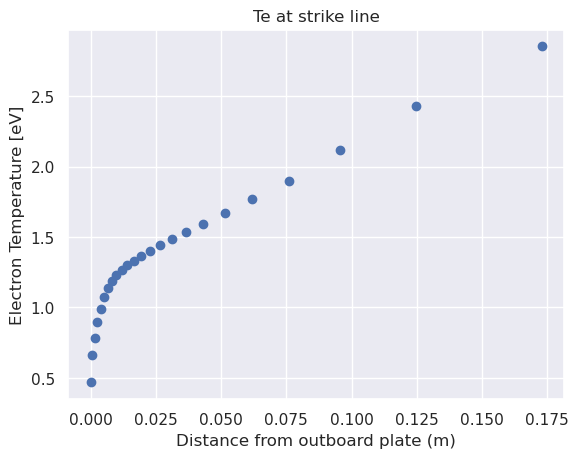

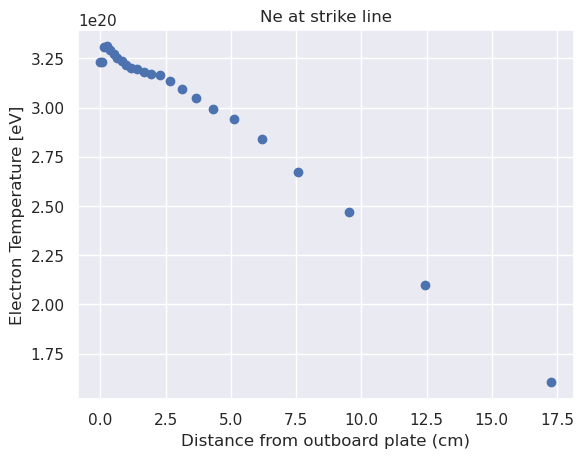

In [12]:
offset = 0.1
var_list = ['te', 'ti', 'nie', 'nn']
z_list = ['z1', 'z2', 'z3']
plasma_vars = {}
for var in var_list:
    plasma_vars[var] = {}

xmin = com.ixpt2[0]+2
zs = com.zm[xmin:,com.iysptrx,0]
rs = com.rm[xmin:,com.iysptrx,0]
dist = np.sqrt((rs - rs[-1])**2 + (zs - zs[-1])**2)
rpt = 0.05
yi = com.ny//2
plasma_vars['te'] = bbb.te[xmin:,com.iysptrx]/bbb.ev
plasma_vars['ti'] = bbb.ti[xmin:,com.iysptrx]/bbb.ev
plasma_vars['nie'] = bbb.ne[xmin:,com.iysptrx]
plasma_vars['nn'] = bbb.ng[xmin:,com.iysptrx, 0]
import seaborn as sns
sns.set_theme()
plt.scatter(dist, plasma_vars['te'])
plt.ylabel('Electron Temperature [eV]')
plt.xlabel('Distance from outboard plate (m)')
plt.title(f'Te at strike line')
plt.figure()
plt.scatter(dist*100, plasma_vars['nie'])
plt.ylabel('Electron Temperature [eV]')
plt.xlabel('Distance from outboard plate (cm)')
plt.title(f'Ne at strike line')

